# Przetworzenie danych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Usunięcie niemożliwych przypadków**

Usunięcie z dataset'u przypadków, w których osoba ma więcej niż 113 lat (nie istniały takie osoby w historii) oraz osób, których wiek wynosił mniej niż ilość przepracowanych lat.

In [4]:
df = df[(df["person_age"]<=113) & (df["person_age"] > df["person_emp_length"])]

**Wykresy gęstości**

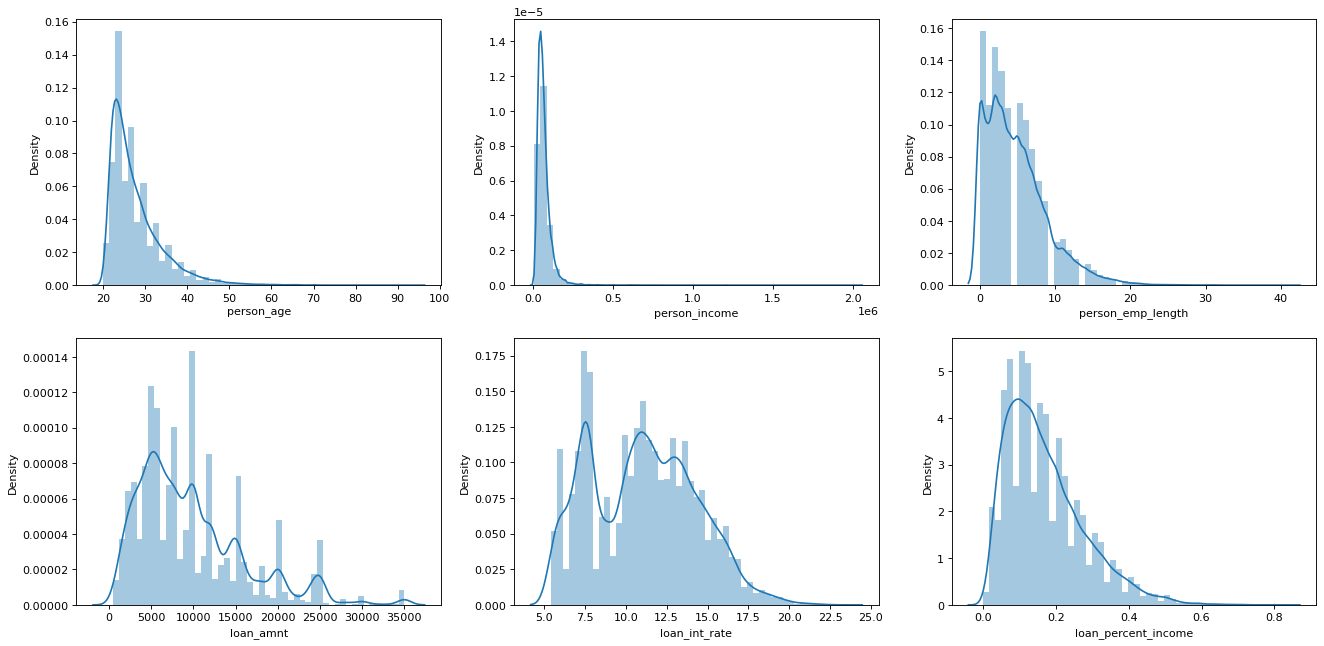

In [5]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',  'loan_percent_income']
plt.figure(figsize=(20,15), dpi= 80)
n = len(columns)
for i, column in enumerate(columns):
    plt.subplot(int(n/3 + 1), 3, i + 1 )
    sns.distplot(df[column], label=column)

**Wykresy gęstości dla danych na których użyto logarytmu**

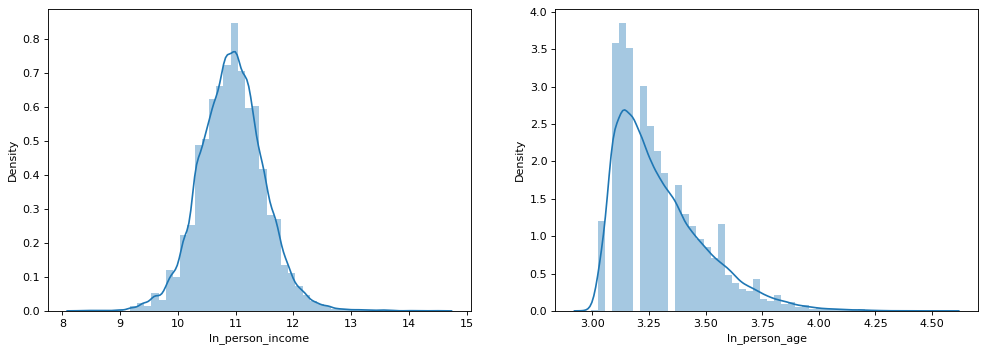

In [6]:
df['ln_person_income'] = np.log(df['person_income'])
df['ln_person_age'] = np.log(df['person_age'])

columns = ['ln_person_income', 'ln_person_age']
plt.figure(figsize=(15,5), dpi= 80)
n = len(columns)
for i, column in enumerate(columns):
    plt.subplot(1, 2, i + 1 )
    sns.distplot(df[column], label=column)

**Wykresy skrzypcowe**

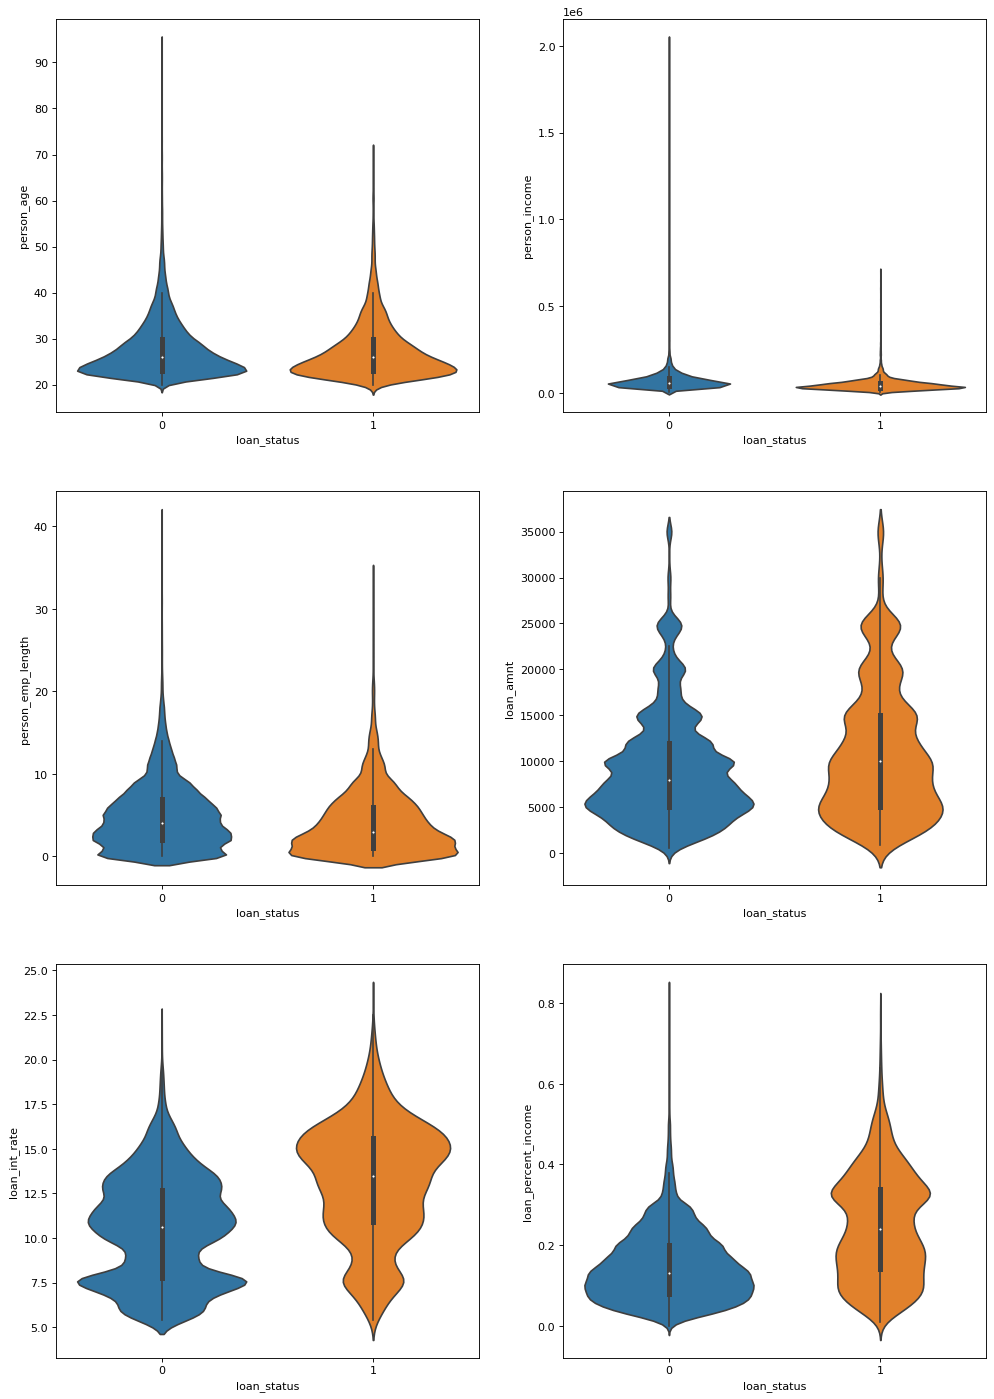

In [7]:
plt.figure(figsize=(15,30), dpi= 80)
cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',  'loan_percent_income']
n_columns = len(df[cols].columns)
for i, col in enumerate(df[cols]):
    plt.subplot(int(n_columns/2 + 1), 2, i + 1 )
    sns.violinplot(x="loan_status", y=col, data=df)

**OPIS ZBIORU DANYCH**

Jest to zbiór danych symulujący dane z biura kredytowego.
Kolejne kolumny zawierają kolejno (numeracja tak jak w zbiorze):
1. Wiek klienta

Zapisana za pomocą liczby całkowitej (integer). Najmniejsza wartość wynosi 20, a najwyższa 144. Należy wziąć to pod uwagę z dwóch powodów. Na początku należy spojrzeć na to, że trzeci kwartyl wieku wynosi 30 co oznacza, że wartość 144 będzie bardzo odstawać od reszty przypadków, co widać też na wykresie poniżej, a dodatkowo najstarsza osoba w historii zmarła w wieku 113 lat, więc każda wyższa wartość jest niezgodna z prawdą.

2. Roczny dochód klienta

Również przedstawiony w postaci liczby całkowitej. Tutaj podobnie jak w przypadku wieku klientów również znajdziemy wartości skrajne w postaci najwyższego rocznego dochodu wynoszącego 6 milionów. Patrząc na wykres możemy zauważyć, że dochód każdego z pozostałych klientów jest mniejszy niż 2 miliony, a znaczna większość (widzimy to po 3 kwartylu) ma roczny dochód nie większy od 100 tysięcy.

3. Status posiadania domu

Opisany za pomocą jednej z 4 wartości: 
* 'OWN' - klient jest w posiadaniu domu
* 'RENT' - klient wynajmuje dom
* 'MORTGAGE' - klient ma dom z hipoteką
* 'OTHER' - inny status mieszkaniowy

4. Długość zatrudnienia

Przedstawiona za pomocą liczby całkowite długość pracy klienta w latach. W tym przypadku również należy zwrócić uwagę na dwa przypadki w których długość zatrudnienia wynosi 123 lata. Co ciekawe przypadki te występują dla klientów w wieku 22 i 21 lat, co oznacza, że dane są błędne i te przypadki też należy usunąć z data setu.

5. Cel kredytu 

Opisany za pomocą jednej z 6 wartości:
* 'PERSONAL' - sprawy prywatne
* 'EDUCATION' - w celu edukacji
* 'MEDICAL' - w celach zdrowotnych
* 'VENTURE' - w celu podróży, wakacji
* 'HOMEIMPROVEMENT' - w celu remontu domu
* 'DEBTCONSOLITADION'  - w celu konsolidacji zadłużenia

6. Ocena kredytu

Opisana przy pomocy liter od 'A' (najlepsza ocena) do 'G' (najgorsza ocena). Określana jest ona na podstawie pozostałych wartości innych kolumn.

7. Wielkość kredytu

Przedstawiona za pomocą liczby całkowitej wielkość zaciągniętego kredytu przez klienta.

8. Stopa oprocentowania

Przedstawiona przy pomocy liczby zmiennoprzecinkowej (float) stopa oprocentowania.

9. Status spłaty kredytu 

Przedstawiona przy pomocy jednej z dwóch wartości: 0 lub 1. 0 oznacza wartość 'Non default' czyli brak sytuacji, w której klient zaprzestał dokonywania płatności za kredyt, natomiast 1 oznacza 'Default', czyli zatrzymanie płatności.

10. Jaką część dochodu stanowi rata kredytu

Przedstawiony w postaci liczby zmiennoprzecinkowej z zakresu 0 do 1 stosunek opłat za raty kredytu do dochodu klienta.

11. Historia spłat kredytów

Przedstawiona w postaci dwóch zmiennych 'Y' oraz 'N' informacja o tym czy w przeszłości wystąpiła sytuacja z zaprzestaniem płatności klienta rat kredytu. 'Y' oznacza 'tak', 'N' - nie.

12. Długość historii kredytowej klienta

Przedstawiony za pomocą liczby całkowitej okres (w latach) historii kredytowej klienta. 

**Wykresy kolumnowe**

[93.07053941908714, 87.54774637127578, 68.92110502737681, 69.1588785046729]
['OWN' 'MORTGAGE' 'RENT' 'OTHER']


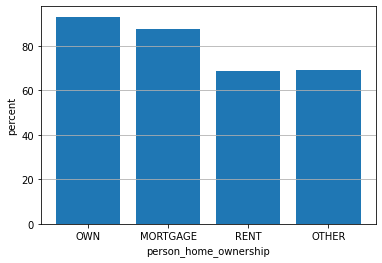

In [8]:
repayed_percent_home_ownership = []
for person_home_ownership in df['person_home_ownership'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['person_home_ownership'] == person_home_ownership)]) / len(df[df['person_home_ownership'] == person_home_ownership]) * 100
    repayed_percent_home_ownership.append(x)

print(repayed_percent_home_ownership)
print(df['person_home_ownership'].unique())


plt.bar(df['person_home_ownership'].unique(), repayed_percent_home_ownership)
plt.xlabel('person_home_ownership')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

Wykres przedstawia procentowy udział, osób które spłaciły kredyt (LOAN_STATUS == 0) w zależności od rodzaju zamieszkania.
Jak widać kredyty były spłacane najczęściej wśród osób które posiadają nieruchomość (OWN) - 92.53%. 
Kolejno mamy osoby mieszkające w nieruchomościach zakupionych na kredyt (MORTGAGE) - 87.43%, 
osoby z grupy OTHER (np. mieszkające z rodzicami) - 69.16% oraz wynajmujące (RENT) - 68.42%.


[83.04707379134861, 73.46108190605392, 85.34125697820998, 80.51052729644121, 74.44444444444444, 71.62322274881517]
['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


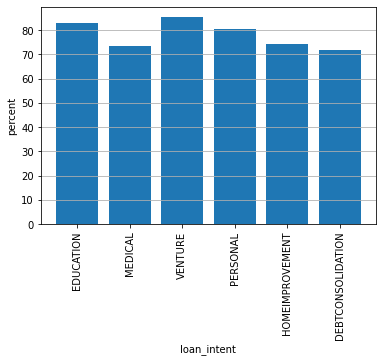

In [9]:
repayed_percent_loan_intent = []
for loan_intent in df['loan_intent'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['loan_intent'] == loan_intent)]) / len(df[df['loan_intent'] == loan_intent]) * 100
    repayed_percent_loan_intent.append(x)

print(repayed_percent_loan_intent)
print(df['loan_intent'].unique())

plt.bar(df['loan_intent'].unique(), repayed_percent_loan_intent)
plt.xlabel('loan_intent')
plt.ylabel('percent')
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.show()

Wykres przedstawia procentowy udział, osób które spłaciły kredyt (LOAN_STATUS == 0) w zależności od celu kredytu.
Jak widać kredyty były spłacane najczęściej przez osóby które wzięły kredyty na podróże (VENTURE) - 85.18%. 
Najrzadziej zaś przez osoby konsolidujące kredyt - 71.41%.

[81.91624121914705, 62.43781094527363]
['N' 'Y']


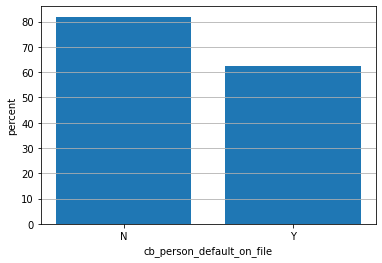

In [10]:
repayed_percent_history_default = []
for cb_person_default_on_file in df['cb_person_default_on_file'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['cb_person_default_on_file'] == cb_person_default_on_file)]) / len(df[df['cb_person_default_on_file'] == cb_person_default_on_file]) * 100
    repayed_percent_history_default.append(x)

print(repayed_percent_history_default)
print(df['cb_person_default_on_file'].unique())

plt.bar(df['cb_person_default_on_file'].unique(), repayed_percent_history_default)
plt.xlabel('cb_person_default_on_file')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

Wykres przedstawia udział osób które spłaciły kredyt w zależności od przeszłych problemów ze spłatą kredytów.

**Zamiana wartości kategorycznych na liczbowe**

In [11]:
column_values = df['person_home_ownership'].unique()
print(column_values)

['OWN' 'MORTGAGE' 'RENT' 'OTHER']


In [12]:
column_values = df['loan_intent'].unique()
print(column_values)

['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [13]:
column_values = df['loan_grade'].unique()
print(column_values)

['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [14]:
column_values = df['cb_person_default_on_file'].unique()
print(column_values)

['N' 'Y']


Zmiana wartości w kolumnach na liczbowe.

In [15]:
df = pd.get_dummies(df, prefix=['person_home_ownership'], columns=['person_home_ownership'], dtype=bool)
df = pd.get_dummies(df, prefix=['loan_intent'], columns=['loan_intent'])
df.loan_grade = df.loan_grade.map( {'A':6 , 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0} )
df.cb_person_default_on_file = df.cb_person_default_on_file.map( {'N':0 , 'Y':1} )
#df['loan_status'] = df['loan_status'].astype('category')

In [16]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,5,1000,11.14,0,0.10,0,2,...,False,False,True,False,0,1,0,0,0,0
2,25,9600,1.0,4,5500,12.87,1,0.57,0,3,...,True,False,False,False,0,0,0,1,0,0
3,23,65500,4.0,4,35000,15.23,1,0.53,0,2,...,False,False,False,True,0,0,0,1,0,0
4,24,54400,8.0,4,35000,14.27,1,0.55,1,4,...,False,False,False,True,0,0,0,1,0,0
5,21,9900,2.0,6,2500,7.14,1,0.25,0,2,...,False,False,True,False,0,0,0,0,0,1


**Wykresy korelacji**

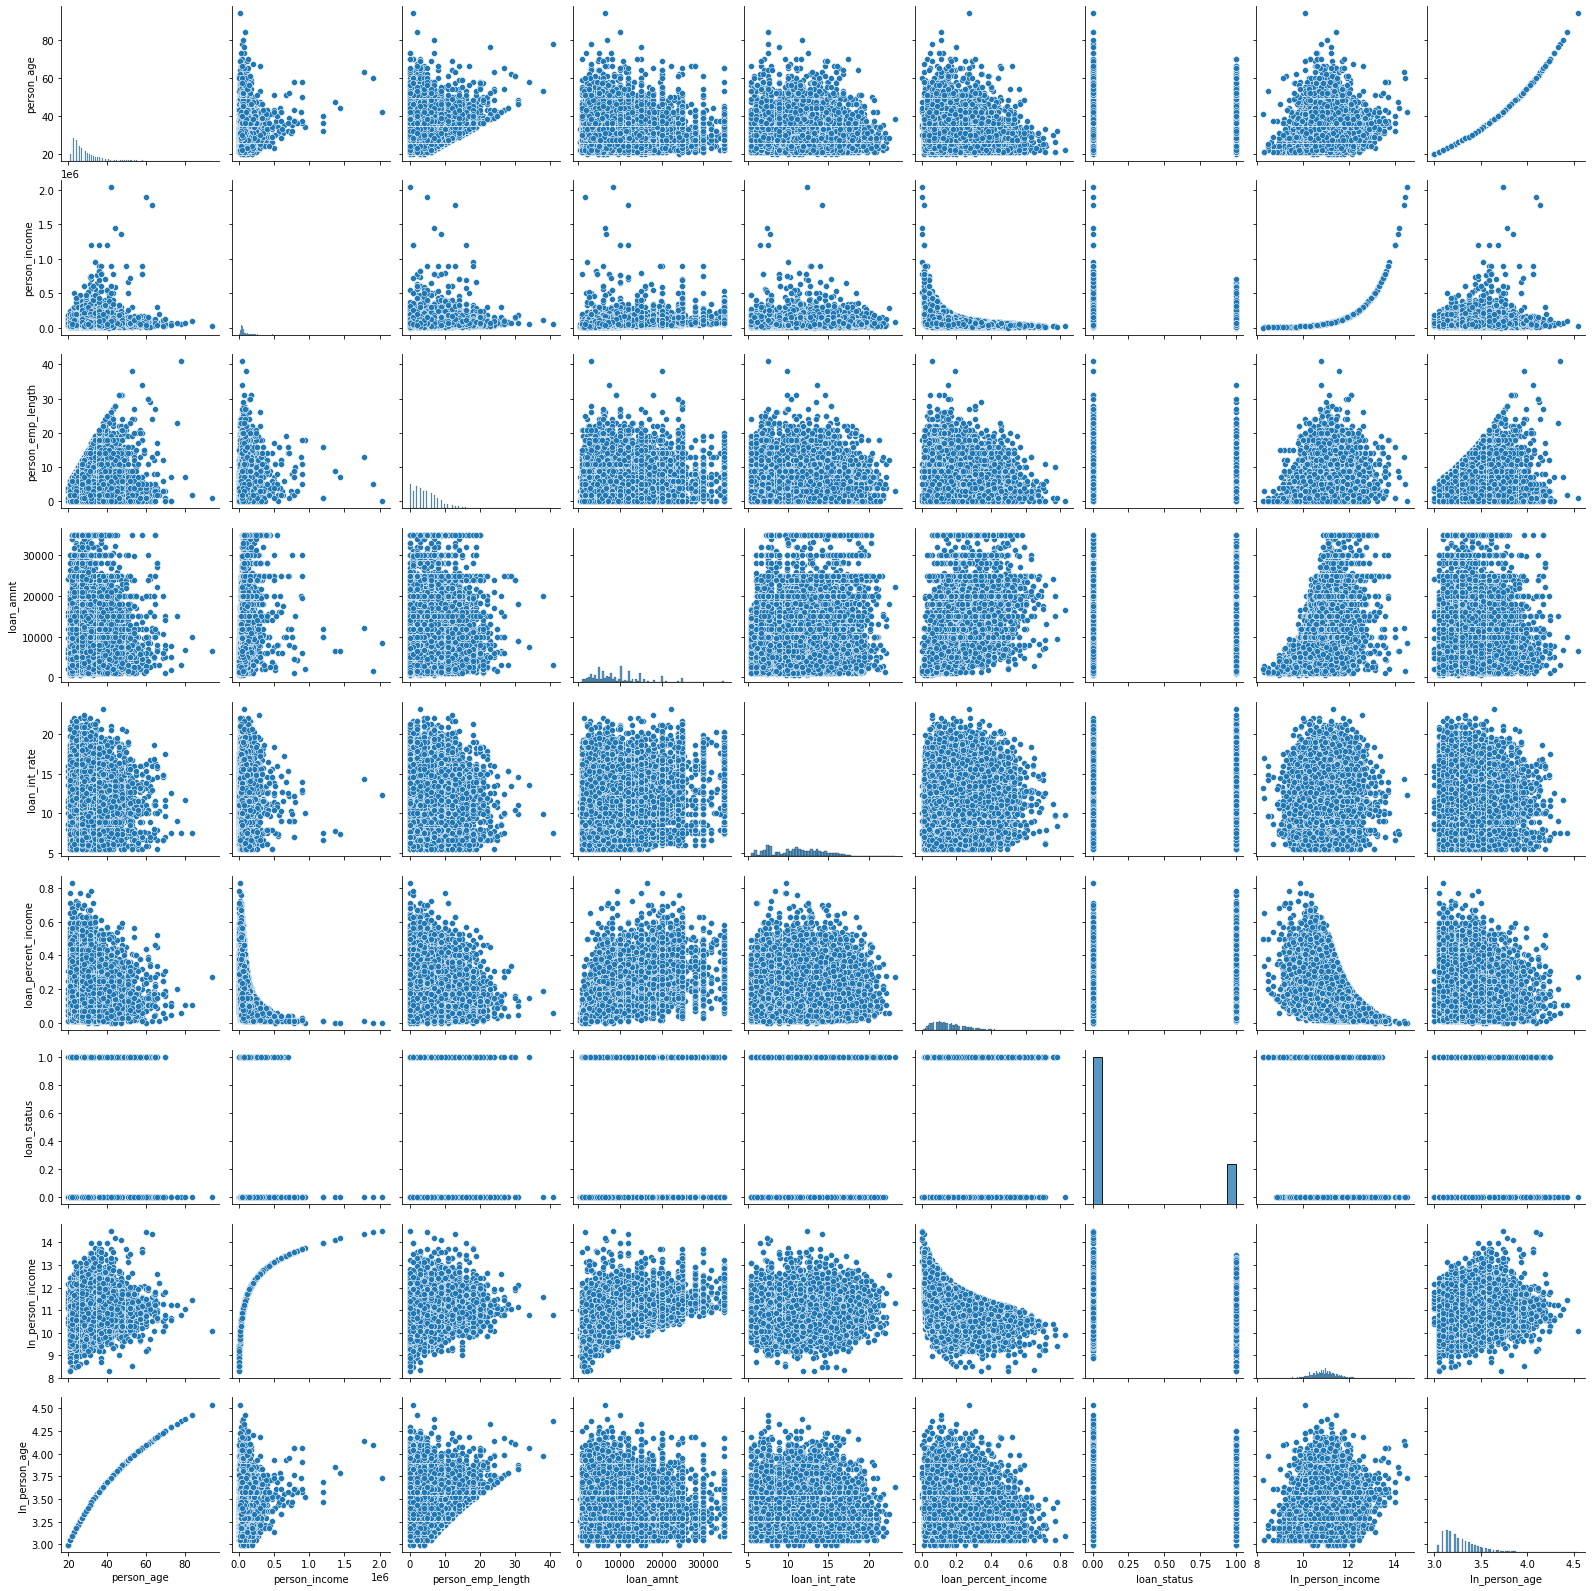

In [17]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',  'loan_percent_income', 'loan_status', 'ln_person_income', 'ln_person_age']
sns.pairplot(df[columns], kind="scatter")
plt.show()

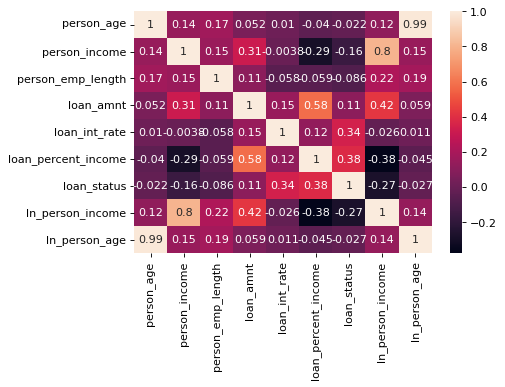

In [18]:
plt.figure(dpi = 80)
sns.heatmap(df[columns].corr(),annot = df[columns].corr())
plt.show()

Na podstawie macierzy korelacji możemy zaobserwować, że najwyższą korelację ma wielkość pożyczki oraz stosunek opłacanych rat do rocznego wynagrodzenia.

Najbardziej powiązane ze spłaceniem kredytu jest stosunek opłacanych rat do rocznego wynagrodzenia (pozytywnie), stopa oprocentowania (pozytywnie) oraz suma rocznego wynagrodzenia (negatywnie).

Zmienne person_income oraz person_age miały rozkład prawoskośny i aby go znormalizować wykorzystaliśmy logarytm naturalny. Jak widać zlogarytmowane zmienne mają wyższą korelację ze zmienną loan_status.

**Braki w danych**

Sprawdzamy które kolumny zawierają braki:

In [19]:
for col in df.columns:
    if df[col].isnull().values.any():
        print(f'Kolumna {col} zawiera braki.')

Kolumna loan_int_rate zawiera braki.


In [20]:
print("Liczba braków w kolumnie person_emp_length: ",df['person_emp_length'].isnull().sum())
print("Liczba braków w kolumnie loan_int_rate: ",df['loan_int_rate'].isnull().sum())

Liczba braków w kolumnie person_emp_length:  0
Liczba braków w kolumnie loan_int_rate:  3047


Jako że danych nie jest dużo to usunięcie wierszy ograniczy nasz model, dlatego w miejsce brakujących danych wstawimy mediany wartości w danych kolumnach. Niestety umożliwi to pojawienie się błędu statystycznego, ale na szczęście wartości tych kolumn nie posiadają zbyt dużego rozrzutu. 

In [21]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

**Hipoteza**

Zmienne mające największy wpływ na zmienną loan status to person_income, loan_int_rate, loan_percent_income. Isotna wydaje się również zmienna loan_amnt. Niewielkie znaczenie dla zmiennej loan_status mają zmienne person_emp_length i person_age.

W dalszej części projektu postaramy się stworzyć model obliczający prawdopodobieństwo spłacenia kredytu dla klienta, którego wyżej wymienione parametry są znane.

# Analiza danych

In [22]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

**Stworzenie kolumny z predziałami wieku**

In [23]:
# Jako, że stężenie ludzi biorących kredyty jest najwyższe w wieku lat 20-30, to podział na podgrupy jest bardziej zegęszczony w tym okresie.
# 20-23, 23-26, 26-30, 30-35, 35-42, > 42
ages = [20, 23, 26, 30, 35, 42, 120] 
labels = [1, 2, 3, 4, 5, 6]   
df["person_age_categorical"] = pd.cut(df["person_age"], ages, labels = labels, include_lowest = True)
df["person_age_categorical"] = df["person_age_categorical"].astype("category")
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'ln_person_income', 'ln_person_age', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_age_categorical'],
      dtype='object')

In [24]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_age_categorical' ]

X_train, X_test, y_train, y_test = train_test_split(df[columns], df['loan_status'], test_size=0.2)


train_dataset = pd.concat([X_train, y_train], axis=1)




riskmodel = smf.logit(formula = 
                      """loan_status ~ person_age + person_income  +  person_emp_length + loan_amnt + loan_int_rate + 
                      loan_percent_income + cb_person_default_on_file + cb_person_cred_hist_length + 
                      person_home_ownership_MORTGAGE + person_home_ownership_OTHER + 
                      person_home_ownership_OWN+person_home_ownership_RENT + loan_intent_DEBTCONSOLIDATION + 
                      loan_intent_EDUCATION + loan_intent_HOMEIMPROVEMENT + loan_intent_MEDICAL + loan_intent_PERSONAL + 
                      loan_intent_VENTURE + person_age_categorical""", 
                      data = train_dataset).fit()




         Current function value: 0.364299
         Iterations: 35


C:\Users\jakub\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
riskmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25343
Model:                          Logit   Df Residuals:                    25321
Method:                           MLE   Df Model:                           21
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3026
Time:                        12:23:38   Log-Likelihood:                -9232.4
converged:                      False   LL-Null:                       -13238.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.7148        nan        nan        nan         nan         nan
person_home_ownership_MORTGAGE[T.True]    -2.1678   2.49e+05   -8.7e-06      1.000   -4.88e+05    4.88e+05
person_home_ownership_OTHER[T.True]       -1.7459   2.49e+05  -7.01e-06      1.000   -4.88e+05    4.88e+05
person_home_ownership_OWN[T.True]         -3.7247   2.49e+05  -1.49e-05      1.000   -4.88e+05    4.88e+05
person_home_ownership_RENT[T.True]        -1.3997   2.49e+05  -5.61e-06      1.000   -4.89e+05    4.89e+05
person_age_categorical[T.2]               -0.1097      0.060     -1.822      0.068      -0.228       0.008
person_age_categorical[T.3]               -0.1923      0.096     -1.995      0.046      -0.381      -0.003
person_age_categorical[T.4]               -0.1447      0.141     -1.025      0.305      -0.421       0.132
person_age_categorical[T.5]               -0.2080      0.220     -0.946      0.344      -0.639       0.223
person_age_categorical[T.6]               -0.1482      0.345     -0.430      0.668      -0.824       0.528
person_age                                -0.0030      0.013     -0.233      0.815      -0.028       0.022
person_income                           1.677e-06   5.25e-07      3.194      0.001    6.48e-07    2.71e-06
person_emp_length                         -0.0114      0.005     -2.189      0.029      -0.022      -0.001
loan_amnt                              -8.891e-05   4.74e-06    -18.747      0.000   -9.82e-05   -7.96e-05
loan_int_rate                              0.3027      0.008     39.851      0.000       0.288       0.318
loan_percent_income                       12.4236      0.281     44.285      0.000      11.874      12.973
cb_person_default_on_file                  0.2122      0.047      4.498      0.000       0.120       0.305
cb_person_cred_hist_length                 0.0074      0.013      0.591      0.555      -0.017       0.032
loan_intent_DEBTCONSOLIDATION             -0.3818   3.12e+05  -1.22e-06      1.000   -6.11e+05    6.11e+05
loan_intent_EDUCATION                     -1.2093   3.12e+05  -3.88e-06      1.000   -6.11e+05    6.11e+05
loan_intent_HOMEIMPROVEMENT               -0.2746   3.12e+05  -8.81e-07      1.000   -6.11e+05    6.11e+05
loan_intent_MEDICAL                       -0.5387   3.12e+05  -1.73e-06      1.000   -6.11e+05    6.11e+05
loan_intent_PERSONAL                      -0.9762   3.12e+05  -3.13e-06      1.000   -6.11e+05    6.11e+05
loan_intent_VENTURE                       -1.3987   3.12e+05  -4.49e-06      1.000   -6.11e+05    6.11e+05
==========================================================================================================
"""

Istotne statystycznie są zmienne dla których P<=0.05:
cb_person_default_on_file
person_income
loan_amnt
loan_int_rate
loan_percent_income

In [26]:
columns = ['cb_person_default_on_file', 'ln_person_income', 'loan_int_rate', 'loan_percent_income']

X_train, X_test, y_train, y_test = train_test_split(df[columns], df['loan_status'], test_size=0.2)


train_dataset = pd.concat([X_train, y_train], axis=1)




riskmodel = smf.logit(formula = 
                      """loan_status ~ cb_person_default_on_file + ln_person_income +  loan_int_rate + loan_percent_income""", 
                      data = train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.388795
         Iterations 7


In [27]:
riskmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25343
Model:                          Logit   Df Residuals:                    25338
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.2560
Time:                        12:23:39   Log-Likelihood:                -9853.2
converged:                       True   LL-Null:                       -13243.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.9414      0.401     12.324      0.000       4.156       5.727
cb_person_default_on_file     0.1626      0.046      3.567      0.000       0.073       0.252
ln_person_income             -1.0291      0.037    -28.052      0.000      -1.101      -0.957
loan_int_rate                 0.2954      0.007     41.155      0.000       0.281       0.310
loan_percent_income           7.2320      0.174     41.655      0.000       6.892       7.572
=============================================================================================
"""

In [28]:
def predict_output(w,x):
    w = w.T
    predicted = np.dot(x,w)
    return predicted


def policz_SSE(model, data, outcome):
    # Wylicz przewidywaną wartość
    predicted = predict_output(model,data)
    # Policz błąd bezwzglęny
    error = np.subtract(predicted, outcome) 
    # Podnieś błędy do kwadratu i zsumuj je
    squared = np.square(error)
    SSE = np.sum(squared)
    return(SSE)   

In [29]:
#policz_SSE(riskmodel, X_test[columns], y_test )
print(type(riskmodel))
y_pred = riskmodel.predict(X_test[columns])
print(y_pred)
print(type(df['loan_status'].iloc[1]))


<class 'statsmodels.discrete.discrete_model.BinaryResultsWrapper'>
26766    0.135635
16295    0.090480
4219     0.063389
12097    0.018790
2808     0.120293
           ...   
7387     0.694428
18763    0.023197
11114    0.321889
3996     0.075210
10843    0.222315
Length: 6336, dtype: float64
<class 'numpy.int64'>


In [57]:


predicted_values1 = riskmodel.predict(X_test[columns])

threshold=0.001

predicted_class1=np.zeros(predicted_values1.shape)

predicted_class1[predicted_values1>threshold]=1

cm1 = confusion_matrix(y_test,predicted_class1)

print('Confusion Matrix : \n', cm1)  

Confusion Matrix : 
 [[   2 4998]
 [   0 1336]]


gorny lewy: poprawnie przewidzeni "non-defaulters" (splacili)

dolny prawy: poprawnie przewidzeni "defaulters" (nie splacili)

gorny prawy: blednie zakwalifikowani jako niesplacajacy (splaciliby ale nie dostali kredytu)

dolny lewy: blednie zakwalifikowani jako splacajacy (niesplacili ale dostali kredyt)

In [54]:
sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

print('Sensitivity : ', sensitivity)

specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print('Specificity : ', specificity ) 

Sensitivity :  1.0
Specificity :  0.0004


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def test_model(model, threshold):
    predicted_values1 = model.predict(X_test[columns])

    predicted_class1=np.zeros(predicted_values1.shape)

    predicted_class1[predicted_values1>threshold]=1

    cm1 = confusion_matrix(y_test,predicted_class1)

    print('Confusion Matrix : \n', cm1)  
    
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    print('Sensitivity : ', sensitivity)

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    print('Specificity : ', specificity ) 
    print(classification_report(y_test,predicted_class1))  

In [59]:
test_model(riskmodel, 0.5)

Confusion Matrix : 
 [[4768  232]
 [ 794  542]]
Sensitivity :  0.405688622754491
Specificity :  0.9536
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5000
           1       0.70      0.41      0.51      1336

    accuracy                           0.84      6336
   macro avg       0.78      0.68      0.71      6336
weighted avg       0.82      0.84      0.82      6336

